In [ ]:
https://github.com/The-Knowledge-House/DS_22/blob/main/phase_2/week_14/3_7/eop_review.md#location-1-2--3-visualizations--statistics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df=pd.read_csv('data/predict_data.csv')

In [2]:
df.head()

,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,date_time,...,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
0,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
1,11,Lead Data Analyst,Laka & Company,"Bentonville, AR",via LinkedIn,"['10 hours ago', '100K to 140K a year', 'Full-...",10 hours ago,Full-time,False,00:12.6,...,0,0,0,0,0,0,0,0,0,0
2,20,Junior Data Analyst,Educated Solutions Corp,United States,via My Stateline Jobs,"['8 hours ago', '25 to 26 an hour', 'Full-time...",8 hours ago,Full-time,False,00:14.4,...,0,0,0,0,0,0,0,0,0,1
3,58,Healthcare Data Analyst,Pediatrics Northwest,United States,via Job,"['4 hours ago', '25 an hour', 'Full-time', 'He...",4 hours ago,Full-time,False,00:21.9,...,0,0,0,0,0,0,0,0,0,0
4,63,Program Management Data Analyst,Citi,United States,via Big Country Jobs,"['8 hours ago', '73,570 to 110,350 a year', 'F...",8 hours ago,Full-time,False,00:24.4,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['id', 'title', 'company_name', 'location', 'via', 'extensions',
       'posted_at', 'schedule_type', 'work_from_home', 'date_time',
       ...
       'typescript', 'unix', 'unix/linux', 'vb.net', 'vba', 'visio',
       'visual_basic', 'vue', 'vue.js', 'word'],
      dtype='object', length=137)

In [ ]:
#Perform distribution testing & visualization on `standard_salaries`

array([[<AxesSubplot: title={'center': 'salary_standardized'}>]],
      dtype=object)

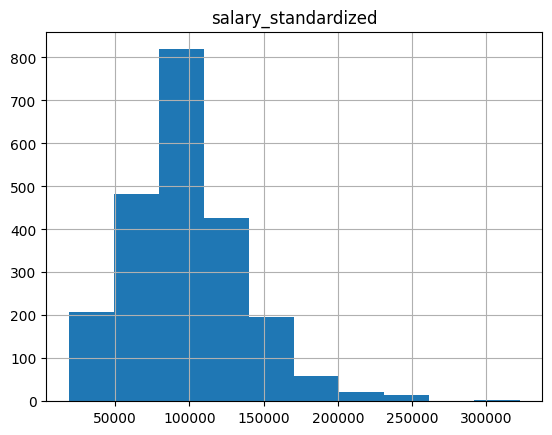

In [4]:
df.hist(column='salary_standardized')

<AxesSubplot: xlabel='salary_standardized', ylabel='Count'>

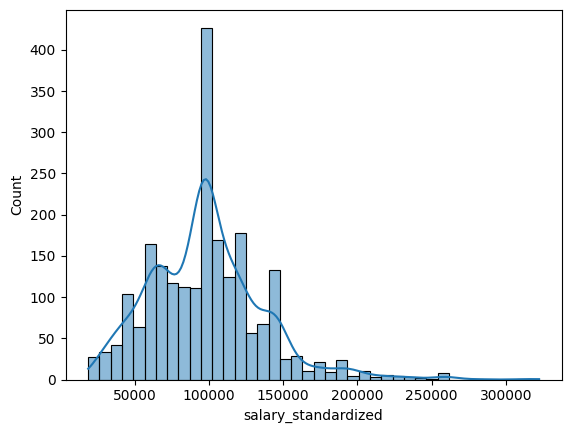

In [5]:
sns.histplot(df['salary_standardized'],kde=True)

<AxesSubplot: ylabel='salary_standardized'>

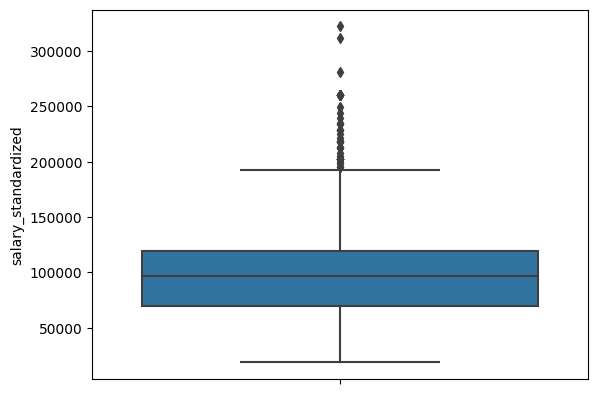

In [6]:
sns.boxplot(data=df,y='salary_standardized')

In [7]:
stats.kstest(df["salary_standardized"], stats.norm.cdf, args=(df["salary_standardized"].mean(), df["salary_standardized"].std()))

KstestResult(statistic=0.0884061189073454, pvalue=1.3144684207219982e-15, statistic_location=104004.6, statistic_sign=1)

In [ ]:
#Perform distribution testing & visualization on `standard_salaries`, grouping `work_from_home == TRUE` and `work_from_home == FALSE` positions together

In [8]:
non_remote=df[df['work_from_home']==True]

<AxesSubplot: xlabel='salary_standardized', ylabel='Count'>

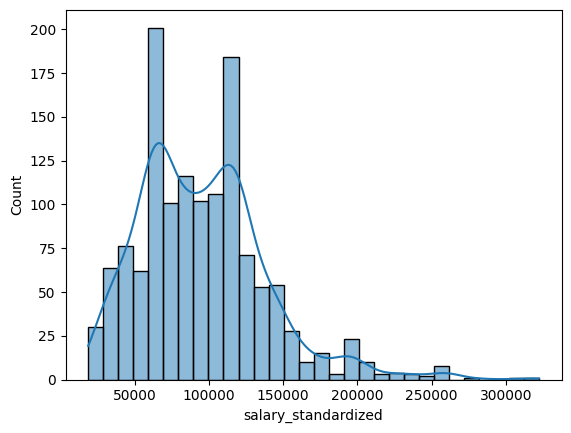

In [9]:
sns.histplot(non_remote,x='salary_standardized',kde=True)

In [10]:
non_remote.shape

(1332, 137)

In [11]:
#
stats.kstest(non_remote["salary_standardized"], stats.norm.cdf, args=(non_remote["salary_standardized"].mean(), non_remote["salary_standardized"].std()))

KstestResult(statistic=0.07387056224442179, pvalue=9.112003142853422e-07, statistic_location=120000.0, statistic_sign=1)

In [12]:
remote=df[df['work_from_home']==False]

In [13]:
remote.shape

(897, 137)

<AxesSubplot: xlabel='salary_standardized', ylabel='Count'>

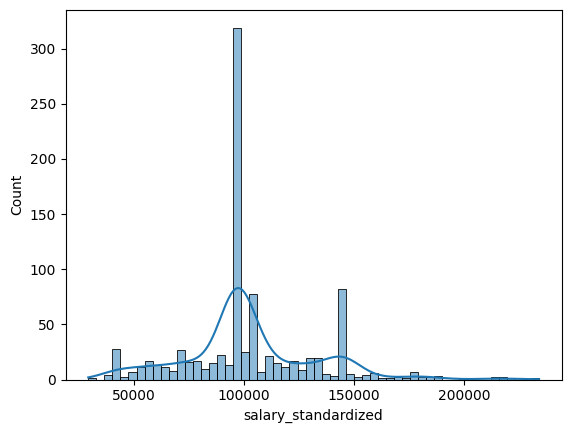

In [14]:
sns.histplot(remote,x='salary_standardized',kde=True)

In [15]:
stats.kstest(remote["salary_standardized"], stats.norm.cdf, args=(remote["salary_standardized"].mean(), remote["salary_standardized"].std()))

KstestResult(statistic=0.18113066066731165, pvalue=3.1845386975985177e-26, statistic_location=104004.6, statistic_sign=1)

<AxesSubplot: xlabel='work_from_home', ylabel='salary_standardized'>

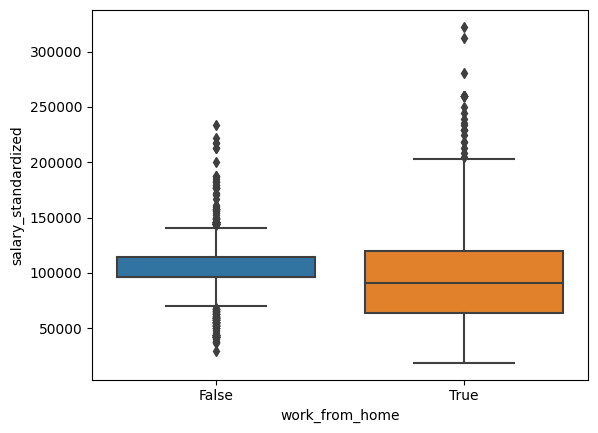

In [16]:
sns.boxplot(data=df,x='work_from_home',y='salary_standardized')

<AxesSubplot: >

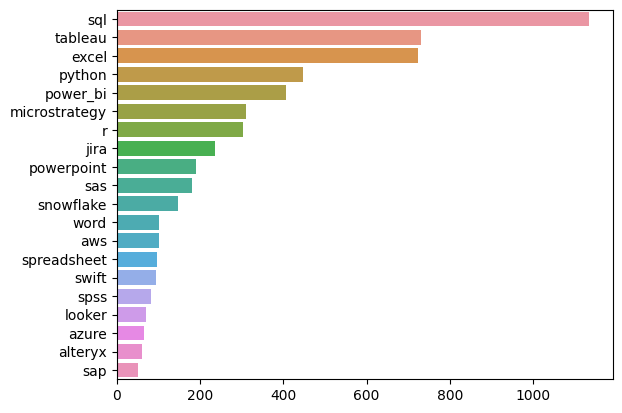

In [17]:
top_skills = df.iloc[:, 20:].sum().sort_values(ascending=False)
selected = top_skills.head(20)
sns.barplot(y=selected.index, x=selected.values, orient='h')

In [ ]:
# Visualize the distribution of `standard_salaries` for `sql` positions

<AxesSubplot: xlabel='sql', ylabel='salary_standardized'>

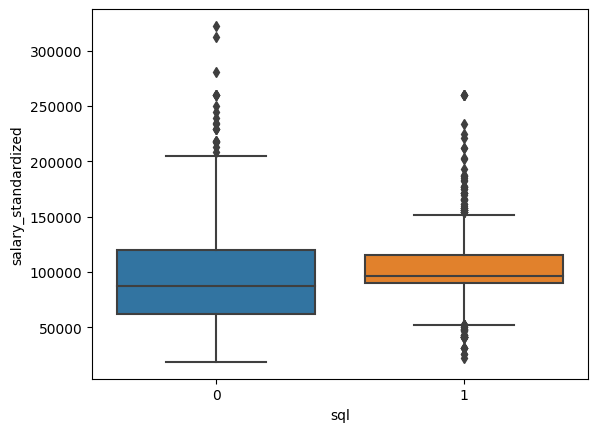

In [18]:
sns.boxplot(data=df,x='sql',y='salary_standardized')

In [19]:
#kstest
stats.kstest(df["sql"], stats.norm.cdf, args=(df["sql"].mean(), df["sql"].std()))

KstestResult(statistic=0.3460366341555834, pvalue=6.2100448584332856e-239, statistic_location=1, statistic_sign=-1)

In [ ]:
#Visualize the distribution of `standard_salaries` for `python` positions

<AxesSubplot: xlabel='python', ylabel='salary_standardized'>

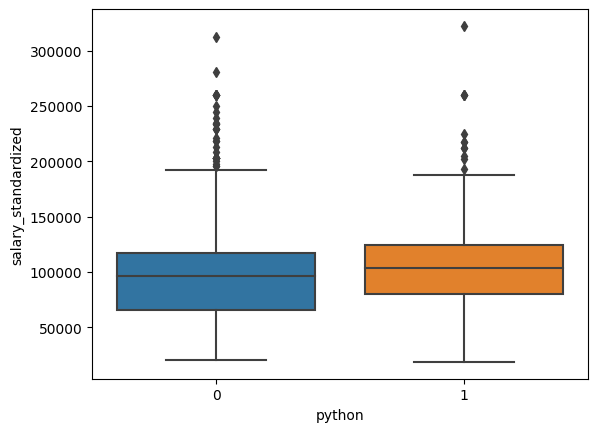

In [20]:
sns.boxplot(data=df,x='python',y='salary_standardized')

In [21]:

stats.kstest(df["python"], stats.norm.cdf, args=(df["python"].mean(), df["python"].std()))

KstestResult(statistic=0.49097845752036395, pvalue=0.0, statistic_location=0, statistic_sign=1)

In [ ]:
#Visualize the distribution of `standard_salaries` for `tableau` positions

<AxesSubplot: xlabel='tableau', ylabel='salary_standardized'>

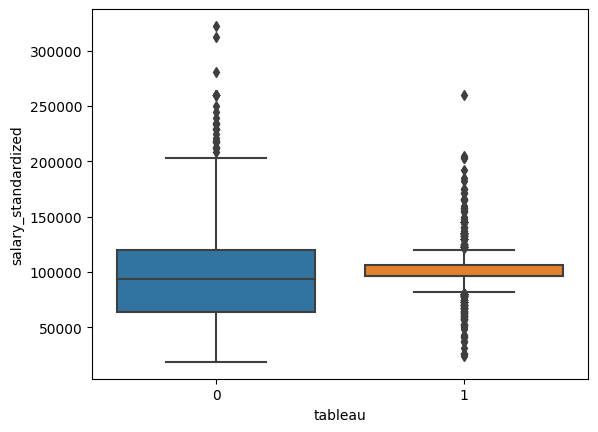

In [22]:
sns.boxplot(data=df,x='tableau',y='salary_standardized')

In [23]:
#kstest

stats.kstest(df["tableau"], stats.norm.cdf, args=(df["tableau"].mean(), df["tableau"].std()))

KstestResult(statistic=0.42958726661934926, pvalue=0.0, statistic_location=0, statistic_sign=1)

In [ ]:
#ranked cities
#bar plot

In [33]:
location=df[(df['location']=='Anywhere')|(df['location']=='United States')|(df['location']=='Kansas City, MO')]
location



,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,date_time,...,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
0,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
2,20,Junior Data Analyst,Educated Solutions Corp,United States,via My Stateline Jobs,"['8 hours ago', '25 to 26 an hour', 'Full-time...",8 hours ago,Full-time,False,00:14.4,...,0,0,0,0,0,0,0,0,0,1
3,58,Healthcare Data Analyst,Pediatrics Northwest,United States,via Job,"['4 hours ago', '25 an hour', 'Full-time', 'He...",4 hours ago,Full-time,False,00:21.9,...,0,0,0,0,0,0,0,0,0,0
4,63,Program Management Data Analyst,Citi,United States,via Big Country Jobs,"['8 hours ago', '73,570 to 110,350 a year', 'F...",8 hours ago,Full-time,False,00:24.4,...,0,0,0,0,0,0,0,0,0,0
5,64,Institutional Credit Management - Lending Data...,Citi,United States,via Big Country Jobs,"['20 hours ago', '105,850 to 158,780 a year', ...",20 hours ago,Full-time,False,00:24.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,11174,SPSS ANCOVA analysis & psychological write up,Upwork,Anywhere,via Upwork,"['23 hours ago', '25 to 35 an hour', 'Work fro...",23 hours ago,Contractor,True,00:42.4,...,0,0,0,0,0,0,0,0,0,0
2225,11179,Fix Google Indexing Issue and set up analytics,Upwork,Anywhere,via Upwork,"['11 hours ago', '16 to 45 an hour', 'Work fro...",11 hours ago,Contractor,True,00:42.4,...,0,0,0,0,0,0,0,0,0,0
2226,11194,Statistician spss,Upwork,Anywhere,via Upwork,"['14 hours ago', '10 to 15 an hour', 'Work fro...",14 hours ago,Contractor,True,00:09.7,...,0,0,0,0,0,0,0,0,0,0
2227,11200,Sales analysis on raw data for an E-Commerce S...,Upwork,Anywhere,via Upwork,"['17 hours ago', '16 to 45 an hour', 'Work fro...",17 hours ago,Contractor,True,00:09.7,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='location', ylabel='salary_standardized'>

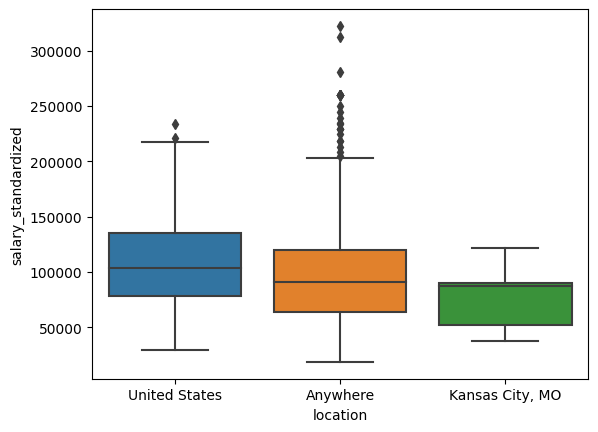

In [34]:
sns.boxplot(data=location,x='location',y='salary_standardized')

In [35]:
df['location'].value_counts()


Anywhere            1332
United States        349
Wichita, KS           20
Maize, KS             19
Tulsa, OK             19
                    ... 
Walnut Grove, MO       1
San Mateo, CA          1
Cupertino, CA          1
Willard, MO            1
Manhattan, KS          1
Name: location, Length: 130, dtype: int64

<AxesSubplot: >

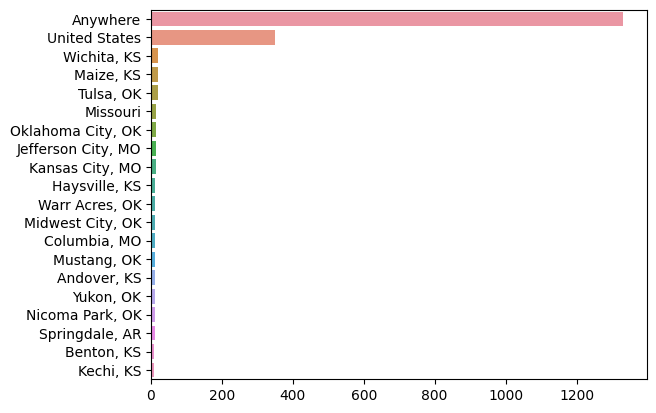

In [36]:
top_location = df['location'].value_counts().sort_values(ascending=False)

selected = top_location.iloc[0:20, ]
sns.barplot(y=selected.index, x=selected.values, orient='h')

In [ ]:
# Visualize the distribution of `standard_salaries` for 3 companies of your choice (that can be found in the dataframe)

In [24]:
df['company_name'].value_counts()

Upwork                        742
Cox Communications            321
EDWARD JONES                  121
Insight Global                 69
Harnham                        64
                             ... 
Inland Empire Health Plans      1
Future Foam Inc                 1
Pediatric Associates            1
WeatherTech                     1
Peraton                         1
Name: company_name, Length: 583, dtype: int64

In [25]:
ignore_comps = ["Upwork", "Corporate", "Talentify.io", "Dice", "Staffigo Technical Services, LLC", "Insight Global", "Harnham", "WayUp", "Jobot", 
            "Addison Group", "Applicantz", "Analytic Recruiting Inc.", "Confidential"]

In [26]:
company=df[df['company_name'].isin(ignore_comps)==False]

In [27]:
company

,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,date_time,...,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
0,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
1,11,Lead Data Analyst,Laka & Company,"Bentonville, AR",via LinkedIn,"['10 hours ago', '100K to 140K a year', 'Full-...",10 hours ago,Full-time,False,00:12.6,...,0,0,0,0,0,0,0,0,0,0
2,20,Junior Data Analyst,Educated Solutions Corp,United States,via My Stateline Jobs,"['8 hours ago', '25 to 26 an hour', 'Full-time...",8 hours ago,Full-time,False,00:14.4,...,0,0,0,0,0,0,0,0,0,1
3,58,Healthcare Data Analyst,Pediatrics Northwest,United States,via Job,"['4 hours ago', '25 an hour', 'Full-time', 'He...",4 hours ago,Full-time,False,00:21.9,...,0,0,0,0,0,0,0,0,0,0
4,63,Program Management Data Analyst,Citi,United States,via Big Country Jobs,"['8 hours ago', '73,570 to 110,350 a year', 'F...",8 hours ago,Full-time,False,00:24.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,11112,Data Analytics Engineer,Eliassen Group,Anywhere,via LinkedIn,"['10 hours ago', '70 to 80 an hour', 'Work fro...",10 hours ago,Contractor,True,00:32.3,...,0,0,0,0,0,0,0,0,0,0
2217,11115,Data Analytics Engineer,Eliassen Group,Anywhere,via LinkedIn,"['10 hours ago', '70 to 80 an hour', 'Work fro...",10 hours ago,Contractor,True,00:32.3,...,0,0,0,0,0,0,0,0,0,0
2221,11123,Staff Data Analyst,Platform Science,Anywhere,via LinkedIn,"['24 hours ago', '98K to 173K a year', 'Work f...",24 hours ago,Full-time,True,00:33.7,...,0,0,0,0,0,0,0,0,0,0
2222,11129,Data Analyst,NYC Careers,"Manhattan, KS",via Indeed,"['20 hours ago', '56,013 to 84,862 a year', 'F...",20 hours ago,Full-time,False,00:33.7,...,0,0,0,0,0,1,0,0,0,1


In [28]:
company['company_name'].value_counts()

Cox Communications            321
EDWARD JONES                  121
Apex Systems                   12
Sedgwick County                11
Citi                           11
                             ... 
Inland Empire Health Plans      1
Future Foam Inc                 1
Pediatric Associates            1
WeatherTech                     1
Peraton                         1
Name: company_name, Length: 575, dtype: int64

<AxesSubplot: >

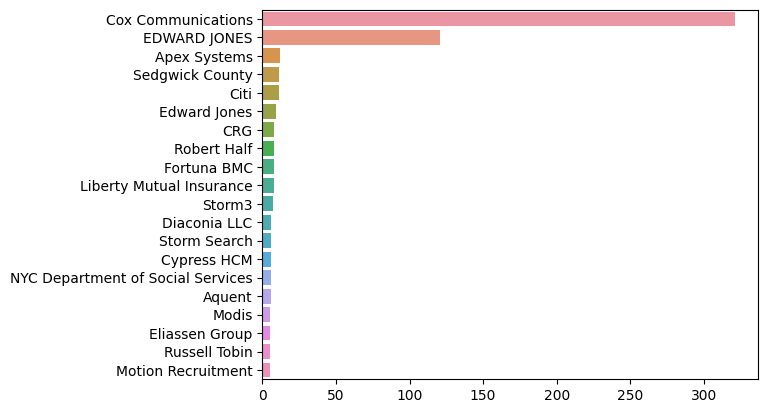

In [29]:
#ranked companies
top_companies = company["company_name"].value_counts().sort_values(ascending=False)

selected = top_companies.iloc[0:20, ]
sns.barplot(y=selected.index, x=selected.values, orient='h')

In [30]:
company=company[(company['company_name']=='EDWARD JONES')|(company['company_name']=='Cox Communications')|(company['company_name']=='Walmart')]

In [31]:
company

,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,date_time,...,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
12,149,Lead-Data Analyst,EDWARD JONES,"St Robert, MO",via WREG Jobs,"['22 hours ago', '106,916 to 182,047 a year', ...",22 hours ago,Full-time,False,00:28.4,...,0,0,0,0,0,0,0,0,0,0
106,566,Senior Data Analyst - Cox Communities,Cox Communications,"Haysville, KS",via ZipRecruiter,"['18 hours ago', '77K to 116K a year', 'Full-t...",18 hours ago,Full-time,False,00:10.8,...,0,0,0,0,0,0,0,0,0,0
109,584,Senior Data Analyst Business Optimization Inte...,Cox Communications,"Goddard, KS",via ZipRecruiter,"['18 hours ago', '77K to 116K a year', 'Full-t...",18 hours ago,Full-time,False,00:26.1,...,0,0,0,0,0,0,0,0,0,0
115,602,Senior Data Analyst Business Optimization Inte...,Cox Communications,"Kechi, KS",via ZipRecruiter,"['18 hours ago', '77K to 116K a year', 'Full-t...",18 hours ago,Full-time,False,00:31.4,...,0,0,0,0,0,0,0,0,0,0
118,613,Senior Data Analyst - Cox Communities,Cox Communications,"Goddard, KS",via ZipRecruiter,"['18 hours ago', '77K to 116K a year', 'Full-t...",18 hours ago,Full-time,False,00:33.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,10098,"Sr. Data Analyst, Marketing Operations",Cox Communications,"Jones, OK",via ZipRecruiter,"['18 hours ago', '77K to 116K a year', 'Full-t...",18 hours ago,Full-time,False,00:36.2,...,0,0,0,0,0,0,0,0,0,0
2034,10116,Senior Data Analysis Engineer,Cox Communications,"Del City, OK",via ZipRecruiter,"['18 hours ago', '84.6K to 127K a year', 'Full...",18 hours ago,Full-time,False,00:53.4,...,0,0,0,0,0,0,0,0,0,0
2127,10520,Lead-Data Analyst,EDWARD JONES,"Warrensburg, MO",via Big Country Jobs,"['10 hours ago', '109,696 to 186,781 a year', ...",10 hours ago,Full-time,False,00:17.0,...,0,0,0,0,0,0,0,0,0,0
2161,10759,Senior Data Analysis Engineer,Cox Communications,"Oklahoma City, OK",via ZipRecruiter,"['18 hours ago', '84.6K to 127K a year', 'Full...",18 hours ago,Full-time,False,00:08.3,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='company_name', ylabel='salary_standardized'>

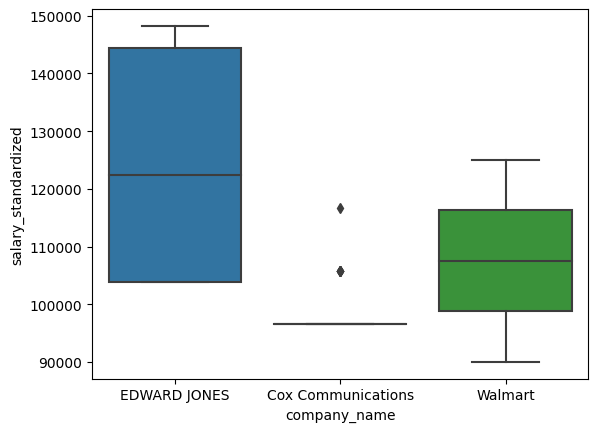

In [32]:
#box plot
sns.boxplot(data=company,x='company_name',y='salary_standardized')